<b>The following outcomes would ideally be expected from the following 4 weeks of internship:
<li>Build an AI algorithm that can classify the cancer type. 
<li>Decrease the amount of predictors while keeping the accuracy high.
<li>Identify the key predictors when a sample has been classified and report on these predictors through a graph, picture etc.
<li>The dataset must be utilised in a 60/40 Train/Test split.

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz

In [2]:
data = pd.read_csv("IX_CancerData_TB.csv")

# <span style="color:#FF6F0C">EDA</span>

In [3]:
data.head(3)

,Unnamed: 0,Type,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,...,ENSG00000009694.12,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,1,BRCA,0.017243,0.000000,1.557943,0.0,5.017788,6.132192,0.0,0.017186,...,0.007595,0.007793,0.0,0.055523,0.028739,10.243520,0.250405,0.0,0.613717,0.0
1,2,BRCA,0.000000,0.003233,2.697767,0.0,4.903484,9.750896,0.0,0.014376,...,0.030789,0.063184,0.0,0.000000,0.000000,16.606613,0.082307,0.0,0.170743,0.0
2,3,BRCA,0.000000,0.000000,5.831249,0.0,3.054890,17.232771,0.0,0.006936,...,0.144831,0.000000,0.0,0.058823,0.121788,20.069360,0.530575,0.0,0.305974,0.0


In [4]:
data.dtypes

Unnamed: 0              int64
Type                   object
ENSG00000242268.2     float64
ENSG00000270112.3     float64
ENSG00000167578.15    float64
                       ...   
ENSG00000105063.17    float64
ENSG00000231119.2     float64
ENSG00000280861.1     float64
ENSG00000123685.7     float64
ENSG00000181518.3     float64
Length: 58442, dtype: object

In [5]:
data.isna().sum()

Unnamed: 0            0
Type                  0
ENSG00000242268.2     0
ENSG00000270112.3     0
ENSG00000167578.15    0
                     ..
ENSG00000105063.17    0
ENSG00000231119.2     0
ENSG00000280861.1     0
ENSG00000123685.7     0
ENSG00000181518.3     0
Length: 58442, dtype: int64

### <span style="color:orange">Data Cleaning</span>

In [6]:
#count the number of zeros in each column
#calculate the percentage
#keep track of the columns that have less than 40% zeros

cols = []

for col in data:
    c = data[col]
    z = (c == 0).sum()
    zeros = z / 2109 * 100
    if zeros < 40:
        cols += [col]

In [7]:
data = data.loc[:, cols]

<b>Cancer Types:
<li>BRCA: Breast Invasive Carcinoma
<li>BLCA: Bladder Urothelial Carcinoma
<li>HNSC: Head and Neck Squamous Cell Carcinoma
<li>KIRC: Kidney Renal Clear Cell Carcinoma
<li>KIRP: Kidney Renal Papillary Cell Carcinoma
<li>COAD: Colon Adenocarcinoma
<li>LIHC: Liver Hepatocellular Carcinoma
<li>LUAD: Lung Adenocarcinoma
<li>LUSC: Lung Squamous Cell Carcinoma	
<li>OV: Ovarian Serous Cystadenocarcinoma
<li>PRAD: Prostate Adenocarcinoma

In [8]:
#divide dataframe according to cancer type
BRCA = data.loc[data.Type=="BRCA", cols]
BLCA = data.loc[data.Type=="BLCA", cols]
HNSC = data.loc[data.Type=="HNSC", cols]
KIRC = data.loc[data.Type=="KIRC", cols]
KIRP = data.loc[data.Type=="KIRP", cols]
COAD = data.loc[data.Type=="COAD", cols]
LIHC = data.loc[data.Type=="LIHC", cols]
LUAD = data.loc[data.Type=="LUAD", cols]
LUSC = data.loc[data.Type=="LUSC", cols]
OV = data.loc[data.Type=="OV", cols]
PRAD = data.loc[data.Type=="PRAD", cols]

### <span style="color:orange">Dimension reduction</span>

In [9]:
data.describe()

,Unnamed: 0,ENSG00000167578.15,ENSG00000078237.5,ENSG00000146083.10,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,ENSG00000134108.11,ENSG00000263089.1,ENSG00000172137.17,...,ENSG00000213782.6,ENSG00000146707.13,ENSG00000135094.9,ENSG00000231612.1,ENSG00000009694.12,ENSG00000186115.11,ENSG00000267117.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000123685.7
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,...,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,1055.000000,3.635264,4.182546,13.169315,0.200361,191.930469,0.167644,27.762056,0.082159,3.047173,...,0.457871,4.370198,17.802599,0.095321,0.743316,3.191828,0.212433,15.504560,0.449303,0.863953
std,608.960179,2.350044,4.770590,7.283324,0.554549,160.992823,0.525611,12.383856,0.298873,11.141904,...,0.394194,3.104703,96.470054,0.215028,1.982985,12.021718,0.295863,7.051332,1.092886,1.015627
min,1.000000,0.435606,0.173593,0.531652,0.000000,18.880745,0.000000,4.958876,0.000000,0.000000,...,0.000000,0.236996,0.051239,0.000000,0.000000,0.000000,0.000000,0.898690,0.000000,0.014896
25%,528.000000,2.182142,2.328920,8.434296,0.018071,109.160270,0.027155,19.503659,0.012565,0.137321,...,0.205244,2.083603,1.126628,0.000000,0.016733,0.005259,0.047337,10.842311,0.091179,0.304265
50%,1055.000000,3.058661,3.590556,11.763797,0.077476,156.024028,0.068786,25.468607,0.032287,0.462232,...,0.351039,3.668490,2.489735,0.043291,0.095683,0.032998,0.122367,14.466283,0.203892,0.550797
75%,1582.000000,4.420560,5.146582,16.141889,0.196730,224.153528,0.142558,33.587505,0.069338,1.859535,...,0.589566,5.754199,4.972762,0.110292,0.640128,0.334817,0.256152,18.971165,0.414331,1.041430
max,2109.000000,38.696938,187.851601,61.809897,12.721510,3887.038686,9.731571,124.233477,6.089799,259.338758,...,4.274700,33.688644,1848.813610,3.547062,29.166522,158.911979,3.552154,94.792173,19.762116,13.888980


In [10]:
# Source: https://github.com/greenelab/tybalt/blob/master/process_data.ipynb
num_mad_genes = 5000

In [258]:
# dimension reduction for entire data frame
mad_genes = data.iloc[:, 1:].mad(axis=0).sort_values(ascending=False)
top_mad_genes = mad_genes.iloc[0:num_mad_genes, ].index
reduced_df = data.loc[:, top_mad_genes]

In [259]:
reduced_df.head()

,ENSG00000198938.2,ENSG00000198712.1,ENSG00000198804.2,ENSG00000198886.2,ENSG00000210082.2,ENSG00000198899.2,ENSG00000198840.2,ENSG00000198727.2,ENSG00000087086.12,ENSG00000198763.3,...,ENSG00000089154.9,ENSG00000106268.14,ENSG00000164182.9,ENSG00000177548.11,ENSG00000124839.11,ENSG00000135211.5,ENSG00000234127.7,ENSG00000105063.17,ENSG00000159251.6,ENSG00000163811.10
0,5074.278246,5715.880814,5004.261682,5729.058331,4935.502794,4306.842875,2313.986776,2969.173798,1445.119139,2832.470551,...,24.637688,7.048504,5.441224,8.376339,5.756629,13.379667,52.640768,10.243520,0.002639,14.563839
1,6194.761496,4039.803827,6160.714848,3440.555180,3892.533127,2478.191087,2143.519988,2975.924023,1718.066499,2554.411329,...,17.822185,5.367048,8.084820,5.391405,4.358179,14.651681,23.165836,16.606613,0.064192,13.731743
2,4332.811846,4166.421909,5240.735453,4351.111406,2128.511701,2877.755003,1933.865667,2651.692939,981.969369,1382.033304,...,14.886280,3.036551,7.805203,10.004771,12.121625,12.628083,13.465283,20.069360,0.100654,9.415324
3,11001.114329,15194.472213,10281.684334,9390.479701,5453.793771,9152.916688,7389.151377,6590.892765,2148.404575,9441.549791,...,17.684747,9.519491,10.675469,16.824475,10.961503,18.776591,23.635495,18.965261,0.051437,9.876463
4,4798.912802,3297.681653,3537.835993,4577.812422,2819.806095,3783.386260,3885.520011,2857.009352,2461.139530,2508.446424,...,12.676651,5.535004,11.425373,15.383321,10.263751,20.639182,21.484331,12.879618,0.003755,10.756120


### <span style="color:orange">Scale</span> 

In [23]:
scaler = StandardScaler().fit_transform(reduced_df.iloc[:, 2:])

In [24]:
scaled_df = pd.DataFrame(scaler, columns=reduced_df.columns[2:], index=reduced_df.index)

In [25]:
scaled_df.head()

,ENSG00000198804.2,ENSG00000198886.2,ENSG00000210082.2,ENSG00000198899.2,ENSG00000198840.2,ENSG00000198727.2,ENSG00000087086.12,ENSG00000198763.3,ENSG00000198888.2,ENSG00000163631.15,...,ENSG00000167986.12,ENSG00000089154.9,ENSG00000106268.14,ENSG00000164182.9,ENSG00000177548.11,ENSG00000124839.11,ENSG00000135211.5,ENSG00000234127.7,ENSG00000105063.17,ENSG00000159251.6
0,-0.474883,-0.344257,-0.165111,-0.328313,-0.564051,-0.429276,-0.571959,-0.393373,-0.401808,-0.243836,...,1.521022,1.399637,-0.241892,-1.174678,-0.070712,-0.222924,-0.434989,4.953965,-0.746283,-0.160249
1,-0.326560,-0.649241,-0.295803,-0.682594,-0.601717,-0.427799,-0.515755,-0.466821,-0.466869,-0.243829,...,1.777577,0.388560,-0.441115,-0.785109,-0.429716,-0.426848,-0.255697,0.684010,0.156327,-0.157061
2,-0.444554,-0.527893,-0.516848,-0.605183,-0.648042,-0.498755,-0.667329,-0.776500,-0.882428,-0.243856,...,1.646847,-0.046980,-0.717237,-0.826314,0.125143,0.705233,-0.540925,-0.721284,0.647521,-0.155172
3,0.201980,0.143694,-0.100166,0.610560,0.557347,0.363318,-0.427141,1.352388,1.408679,-0.243833,...,-0.166959,0.368171,0.050876,-0.403343,0.945364,0.536061,0.325714,0.752048,0.490903,-0.157721
4,-0.662961,-0.497681,-0.430224,-0.429727,-0.216808,-0.453823,-0.362744,-0.478962,-0.134560,-0.243792,...,0.067137,-0.374777,-0.421215,-0.292834,0.772033,0.434314,0.588248,0.440415,-0.372350,-0.160191


In [26]:
# add type column back to data frame 
df = pd.concat([data.iloc[:,1], scaled_df], axis=1)

In [28]:
df

,Type,ENSG00000198804.2,ENSG00000198886.2,ENSG00000210082.2,ENSG00000198899.2,ENSG00000198840.2,ENSG00000198727.2,ENSG00000087086.12,ENSG00000198763.3,ENSG00000198888.2,...,ENSG00000167986.12,ENSG00000089154.9,ENSG00000106268.14,ENSG00000164182.9,ENSG00000177548.11,ENSG00000124839.11,ENSG00000135211.5,ENSG00000234127.7,ENSG00000105063.17,ENSG00000159251.6
0,BRCA,-0.474883,-0.344257,-0.165111,-0.328313,-0.564051,-0.429276,-0.571959,-0.393373,-0.401808,...,1.521022,1.399637,-0.241892,-1.174678,-0.070712,-0.222924,-0.434989,4.953965,-0.746283,-0.160249
1,BRCA,-0.326560,-0.649241,-0.295803,-0.682594,-0.601717,-0.427799,-0.515755,-0.466821,-0.466869,...,1.777577,0.388560,-0.441115,-0.785109,-0.429716,-0.426848,-0.255697,0.684010,0.156327,-0.157061
2,BRCA,-0.444554,-0.527893,-0.516848,-0.605183,-0.648042,-0.498755,-0.667329,-0.776500,-0.882428,...,1.646847,-0.046980,-0.717237,-0.826314,0.125143,0.705233,-0.540925,-0.721284,0.647521,-0.155172
3,BRCA,0.201980,0.143694,-0.100166,0.610560,0.557347,0.363318,-0.427141,1.352388,1.408679,...,-0.166959,0.368171,0.050876,-0.403343,0.945364,0.536061,0.325714,0.752048,0.490903,-0.157721
4,BRCA,-0.662961,-0.497681,-0.430224,-0.429727,-0.216808,-0.453823,-0.362744,-0.478962,-0.134560,...,0.067137,-0.374777,-0.421215,-0.292834,0.772033,0.434314,0.588248,0.440415,-0.372350,-0.160191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,KIRP,3.767631,2.345599,2.008942,1.162152,1.071665,2.886047,1.495768,0.878433,0.783641,...,0.137784,-0.386503,-0.782958,-0.434296,0.086322,2.869157,-0.689242,-0.463384,-0.020184,-0.158763
2105,KIRP,0.394025,1.362803,0.078629,1.376857,1.322545,1.212670,-0.666381,1.456461,0.855361,...,-0.366270,-0.551311,-0.441133,-0.873178,0.793294,1.910771,0.089548,-0.136845,-0.252107,-0.150198
2106,KIRP,-0.586326,0.064854,-0.337621,0.480268,0.851695,0.421161,-0.589207,-0.249286,-0.395532,...,0.038876,0.424708,-0.310809,-1.178212,0.458948,0.235967,0.126679,-0.701162,-0.686194,-0.159554
2107,KIRP,1.002459,0.789552,0.278208,0.654578,0.867780,0.705349,0.514233,0.901098,0.561091,...,-0.443787,-0.474628,-0.203418,-0.477086,-0.140709,1.654884,1.305478,-0.309358,-0.533349,-0.158379


# <span style="color:#FF6F0C">Models</span>

In [260]:
x_data = reduced_df.iloc[:]
y_data = df.iloc[:,0]

In [262]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state = 1)

## <span style="color:#FF8921">Classification Tree</span>

In [263]:
tree = DecisionTreeClassifier()
tree.fit(X = x_train, y = y_train)

DecisionTreeClassifier()

In [265]:
y_pred = tree.predict(x_test)
print('Classification accuracy = ', np.sum(y_test==y_pred)/y_test.shape[0])

conf_matrix = pd.crosstab(y_test, y_pred)
conf_matrix

Classification accuracy =  0.9052132701421801


col_0,BLCA,BRCA,COAD,HNSC,KIRC,KIRP,LIHC,LUAD,LUSC,OV,PRAD
Type,,,,,,,,,,,
BLCA,68,0,1,4,0,0,0,1,2,1,0
BRCA,3,68,0,0,1,0,0,0,3,0,0
COAD,1,0,85,0,0,0,0,0,0,0,0
HNSC,8,1,0,57,1,1,0,0,4,0,0
KIRC,1,1,0,0,68,6,0,0,1,0,0
KIRP,1,1,0,0,6,61,0,0,0,0,0
LIHC,0,1,0,0,0,0,63,0,0,0,0
LUAD,1,0,1,0,0,0,0,69,5,0,0
LUSC,4,1,0,5,3,2,0,3,61,0,0


Text(0, 0.5, 'Training Error')

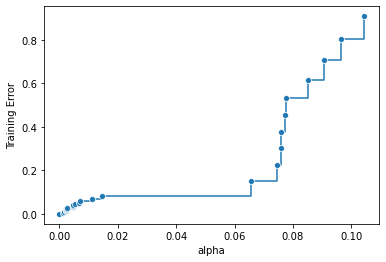

In [266]:
path = tree.cost_complexity_pruning_path(X=x_test, y=y_test)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

p = sns.lineplot(x=ccp_alphas, y=impurities, marker='o', drawstyle='steps-post')
p.set_xlabel('alpha')
p.set_ylabel('Training Error')

In [267]:
cv_accuracy = []

for a in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=a)
    cv_score = cross_val_score(model, X=x_test, y=y_test , scoring="accuracy", cv=10).mean()
    cv_accuracy.append(cv_score)

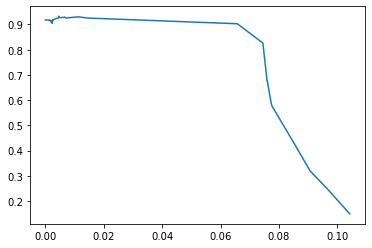

In [268]:
p = sns.lineplot(x=ccp_alphas, y=cv_accuracy)

(0.2, 0.98)

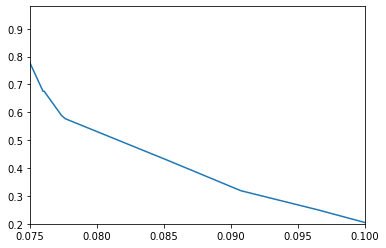

In [269]:
p = sns.lineplot(x=ccp_alphas, y=cv_accuracy)
p.set_xlim(0.075,0.10)
p.set_ylim(0.20,0.98)

In [270]:
def draw_classification_tree(tree, feature_names, class_names):
    dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=feature_names, 
                         class_names=class_names,
                         filled=True, 
                         rounded=True,  
                         special_characters=True,
                               proportion = True) 
    
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render('tree',view=True)

In [271]:
tree_pruned = DecisionTreeClassifier(ccp_alpha=0.01)
tree_pruned.fit(X = x_test, y = y_test)

DecisionTreeClassifier(ccp_alpha=0.01)

In [272]:
gen = x_test.columns[:]

In [274]:
# important gene expressions
g = []
importance = []
for i in range(len(tree_pruned.feature_importances_)):
    if tree_pruned.feature_importances_[i] != 0:
        print(i, gen[i], ":", tree_pruned.feature_importances_[i])
        g += [gen[i]]
        importance += [tree_pruned.feature_importances_[i]]

60 ENSG00000168878.15 : 0.09102602674296342
626 ENSG00000176919.10 : 0.09136134046386475
807 ENSG00000159184.7 : 0.1067812059648633
1164 ENSG00000110400.9 : 0.08770448697267487
1328 ENSG00000113722.15 : 0.11355358843553388
1369 ENSG00000115468.10 : 0.08940075231635589
1565 ENSG00000164736.5 : 0.1227478709169524
2247 ENSG00000158604.13 : 0.017025617752719435
3057 ENSG00000114378.15 : 0.01320769083367345
3443 ENSG00000198914.2 : 0.10029450993350922
3532 ENSG00000132170.18 : 0.07739727225599542
4083 ENSG00000171388.11 : 0.08949963741089396


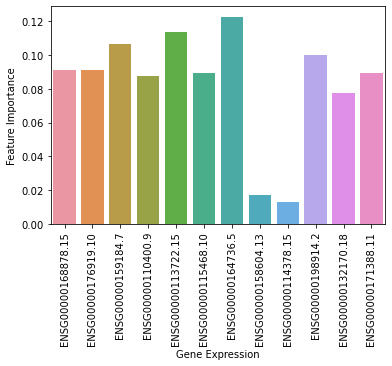

In [331]:
b_graph = sns.barplot(x = g, y = importance)
b_graph.set_xlabel("Gene Expression")
b_graph.set_ylabel("Feature Importance")
b_graph = b_graph.set_xticklabels(labels = g, rotation=90)

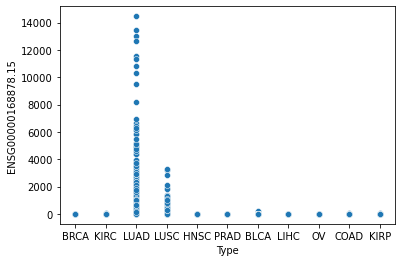

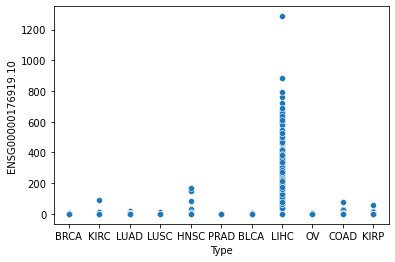

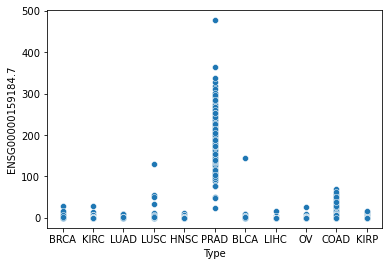

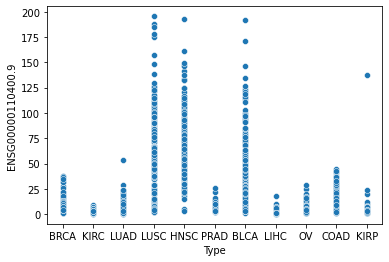

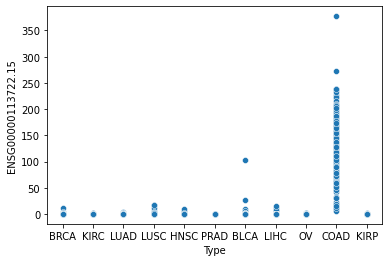

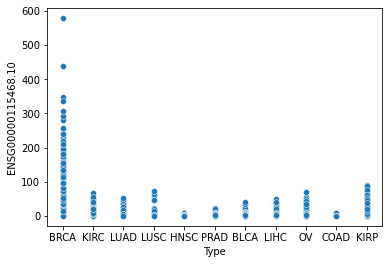

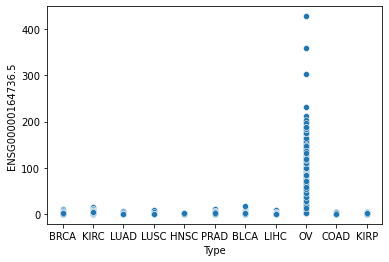

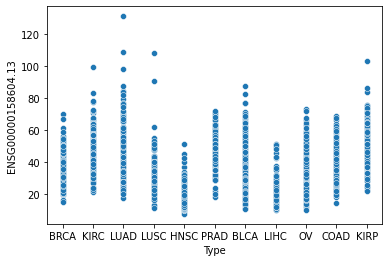

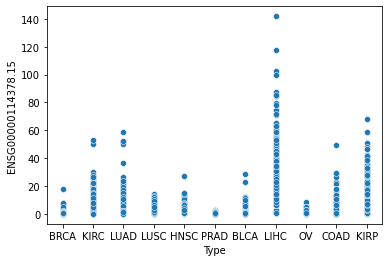

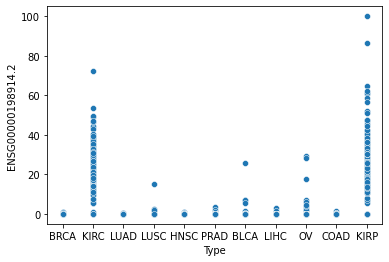

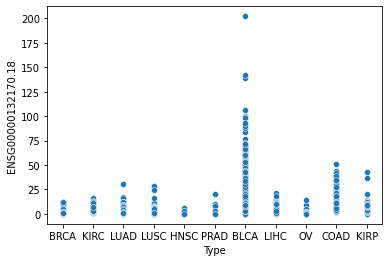

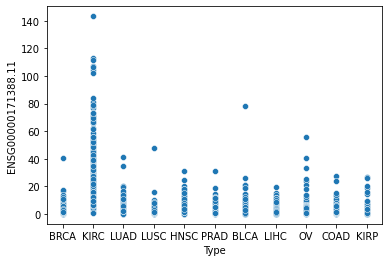

In [422]:
for i in g:
    sns.scatterplot(x=data.Type, y=data[i])
    plt.show()

### <span style="color:orange">Classification Tree Post Feature Selection</span>

In [403]:
# all 12 features with feature importance more than zero (12 features)
im_g1 = data[['ENSG00000168878.15', 'ENSG00000176919.10', 'ENSG00000159184.7', 'ENSG00000110400.9', 
             'ENSG00000113722.15', 'ENSG00000115468.10', 'ENSG00000164736.5', 'ENSG00000158604.13', 
             'ENSG00000114378.15', 'ENSG00000198914.2', 'ENSG00000132170.18', 'ENSG00000171388.11']]

# remove features that have strong positive correlations with more than three cancer types (11 features)
im_g2 = data[['ENSG00000168878.15', 'ENSG00000176919.10', 'ENSG00000159184.7', 'ENSG00000110400.9', 
             'ENSG00000113722.15', 'ENSG00000115468.10', 'ENSG00000164736.5', 'ENSG00000114378.15', 
             'ENSG00000198914.2', 'ENSG00000132170.18', 'ENSG00000171388.11']]

# remove features that have strong positive correlations with more than two cancer types (10 features)
im_g3 = data[['ENSG00000168878.15', 'ENSG00000176919.10', 'ENSG00000159184.7', 'ENSG00000113722.15', 
             'ENSG00000115468.10', 'ENSG00000164736.5', 'ENSG00000114378.15', 'ENSG00000198914.2', 
             'ENSG00000132170.18', 'ENSG00000171388.11']]

In [404]:
x1_data = im_g1.iloc[:]
y1_data = df.iloc[:,0]

x2_data = im_g2.iloc[:]
y2_data = df.iloc[:,0]

x3_data = im_g3.iloc[:]
y3_data = df.iloc[:,0]

In [405]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_data, y1_data, test_size=0.4, random_state = 1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2_data, y2_data, test_size=0.4, random_state = 1)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3_data, y3_data, test_size=0.4, random_state = 1)

In [406]:
tree1 = DecisionTreeClassifier()
tree1.fit(X = x1_train, y = y1_train)

tree2 = DecisionTreeClassifier()
tree2.fit(X = x2_train, y = y2_train)

tree3 = DecisionTreeClassifier()
tree3.fit(X = x3_train, y = y3_train)

DecisionTreeClassifier()

In [411]:
y1_pred = tree1.predict(x1_test)
print('Classification accuracy w/12 features = ', np.sum(y1_test==y1_pred)/y1_test.shape[0])

y2_pred = tree2.predict(x2_test)
print('Classification accuracy w/11 features = ', np.sum(y2_test==y2_pred)/y2_test.shape[0])

y3_pred = tree3.predict(x3_test)
print('Classification accuracy w/10 features = ', np.sum(y3_test==y3_pred)/y3_test.shape[0])

# conf_matrix2 = pd.crosstab(y2_test, y2_pred)
# conf_matrix2

Classification accuracy w/12 features =  0.909952606635071
Classification accuracy w/11 features =  0.9040284360189573
Classification accuracy w/10 features =  0.8755924170616114


### <span style="color:orange">Cross Validation (decision tree)</span>

In [679]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=x2_data, y=y2_data)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.91513210478324 {'max_depth': 10}


## <span style="color:#FF8921 ">Random Forest</span>

In [585]:
rf_df = pd.concat([data.iloc[:,1], x_data], axis=1)
rf_y_train = pd.get_dummies(y_train)
rf_y_test = pd.get_dummies(y_test)

In [586]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=13)
regressor.fit(x_train, rf_y_train)
y_pred = regressor.predict(x_test)

In [587]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(rf_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(rf_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(rf_y_test, y_pred)))

Mean Absolute Error: 0.02012063765618268
Mean Squared Error: 0.0072582938388625565
Root Mean Squared Error: 0.08519562100755271


In [588]:
dummies_removed = pd.DataFrame(y_pred, 
                  columns=['BLCA', 'BRCA', 'COAD', 'HNSC', 
                           'KIRC', 'KIRP', 'LIHC', 'LUAD', 
                           'LUSC', 'OV', 'PRAD'])
dummies_removed.head(3)

,BLCA,BRCA,COAD,HNSC,KIRC,KIRP,LIHC,LUAD,LUSC,OV,PRAD
0,0.13,0.06,0.0,0.02,0.00,0.02,0.01,0.02,0.06,0.01,0.67
1,0.00,0.00,0.0,0.00,0.02,0.01,0.97,0.00,0.00,0.00,0.00
2,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [589]:
s1 = rf_y_test.idxmax(axis = 1)

In [590]:
s2 = dummies_removed.idxmax(axis = 1)

In [593]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(s1, s2))
print(classification_report(s1, s2))
print(accuracy_score(s1, s2))

[[74  0  1  1  0  0  0  0  1  0  0]
 [ 3 71  0  0  0  0  0  0  1  0  0]
 [ 1  0 85  0  0  0  0  0  0  0  0]
 [ 4  3  0 64  0  0  0  0  1  0  0]
 [ 2  0  0  0 73  2  0  0  0  0  0]
 [ 1  0  0  0  4 64  0  0  0  0  0]
 [ 1  0  0  0  0  0 63  0  0  0  0]
 [ 1  0  1  0  0  0  0 71  3  0  0]
 [ 2  1  0  3  0  0  0  2 71  0  0]
 [ 4  0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  0  0  0  0  0  0  0 77]]
              precision    recall  f1-score   support

        BLCA       0.80      0.96      0.87        77
        BRCA       0.95      0.95      0.95        75
        COAD       0.98      0.99      0.98        86
        HNSC       0.94      0.89      0.91        72
        KIRC       0.95      0.95      0.95        77
        KIRP       0.97      0.93      0.95        69
        LIHC       1.00      0.98      0.99        64
        LUAD       0.97      0.93      0.95        76
        LUSC       0.92      0.90      0.91        79
          OV       1.00      0.96      0.98        92
        

In [624]:
# important gene expressions
rf_g = []
rf_importance = []
for i in range(len(regressor.feature_importances_)):
    if regressor.feature_importances_[i] != 0:
        # print(i, gen[i], ":", regressor.feature_importances_[i])
        rf_g += [gen[i]]
        rf_importance += [regressor.feature_importances_[i]]

In [632]:
print(len(rf_g))

1787


In [639]:
# important gene expressions
rf_g2 = []
rf_importance2 = []
for i in range(len(rf_importance)):
    if rf_importance[i] >= 0.01:
        # print(i, gen[i], ":", regressor.feature_importances_[i])
        rf_g2 += [rf_g[i]]
        rf_importance2 += [rf_importance[i]]

In [640]:
rf_importance2

[0.013090478407509756,
 0.024074691039458855,
 0.041116302429654646,
 0.02680859662927147,
 0.07155343294896732,
 0.028508295593594687,
 0.011989445872447215,
 0.013272014238147032,
 0.030113410254468988,
 0.03187065814150998,
 0.025000564704151743,
 0.02347442226677325,
 0.01232044887539253,
 0.09411643885252573,
 0.014736512586373136,
 0.05588601948853371,
 0.021217541027938044,
 0.01335835060432113,
 0.07149653262877213,
 0.02128138489878909,
 0.031239659003497785,
 0.028674817913197762,
 0.021176290852729655]

In [641]:
print(len(rf_g2))

23


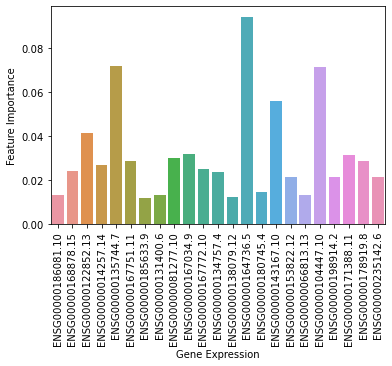

In [642]:
b_graph2 = sns.barplot(x = rf_g2, y = rf_importance2)
b_graph2.set_xlabel("Gene Expression")
b_graph2.set_ylabel("Feature Importance")
b_graph2 = b_graph2.set_xticklabels(labels = rf_g2, rotation=90)

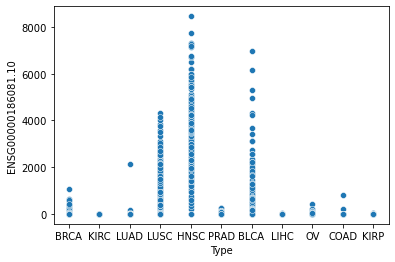

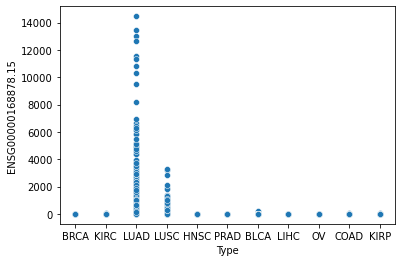

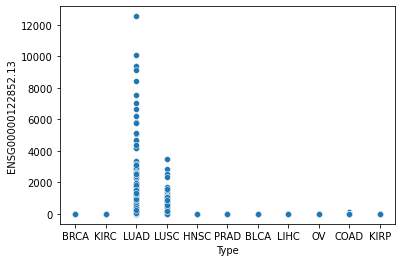

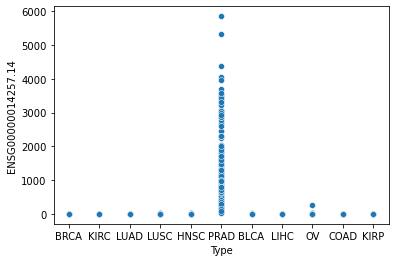

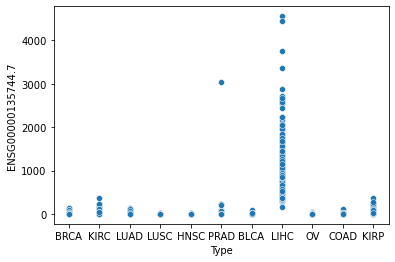

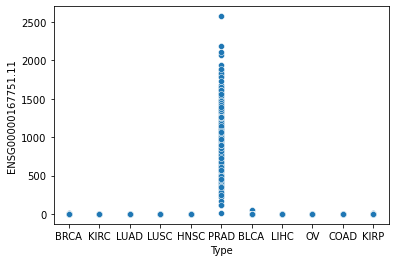

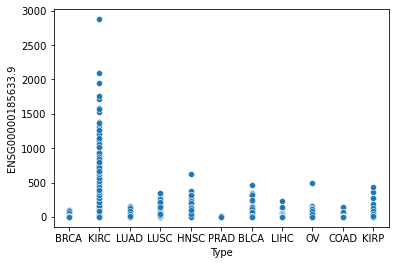

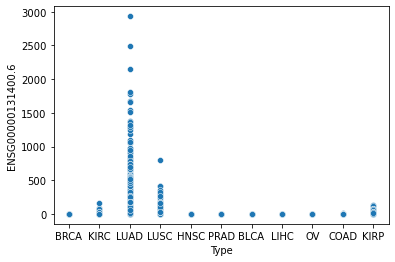

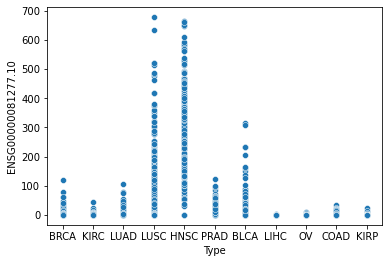

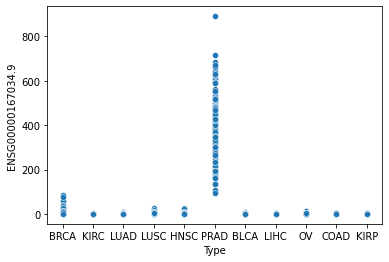

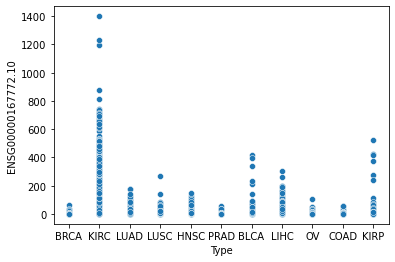

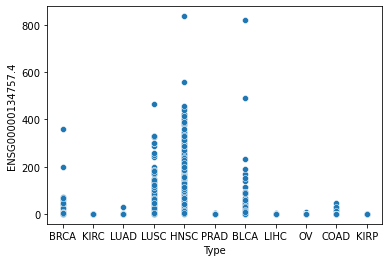

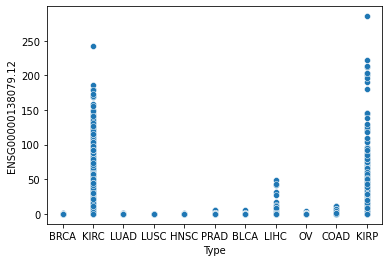

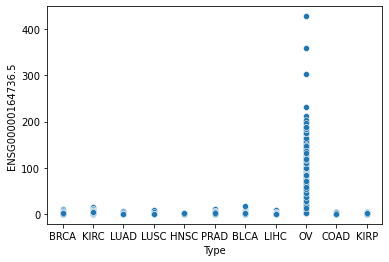

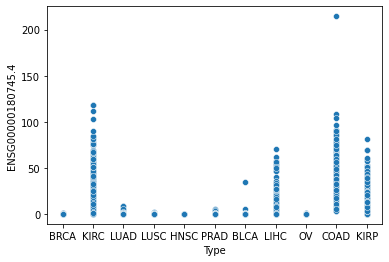

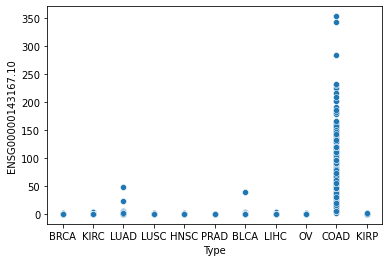

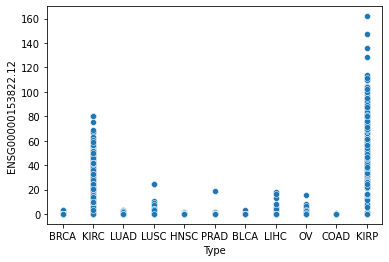

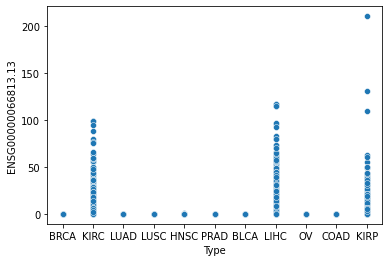

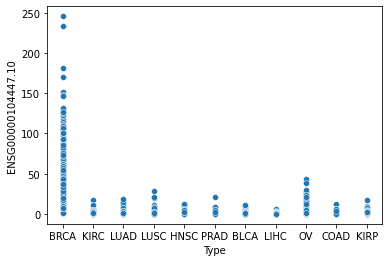

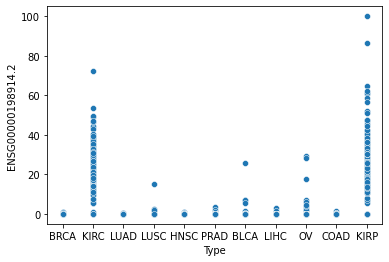

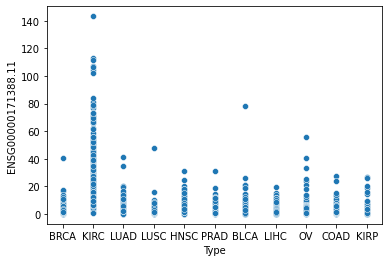

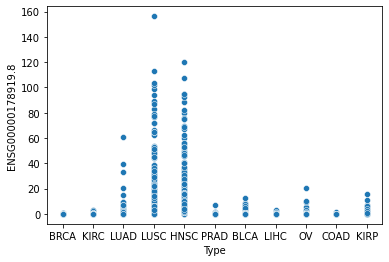

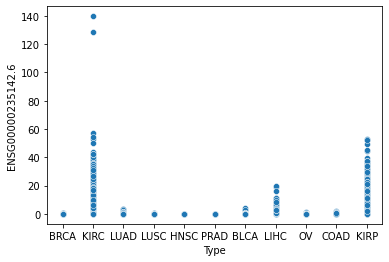

In [643]:
for i in rf_g2:
    sns.scatterplot(x=data.Type, y=data[i])
    plt.show()

### <span style="color:orange">Random Forest Post Feature Selection</span>

In [644]:
rf_img = pd.DataFrame(rf_importance2, rf_g2)

In [647]:
rf_img = rf_img.sort_values(by=rf_img.columns[0], ascending=False)

In [664]:
rf_img

,0
ENSG00000164736.5,0.094116
ENSG00000135744.7,0.071553
ENSG00000104447.10,0.071497
ENSG00000143167.10,0.055886
ENSG00000122852.13,0.041116
ENSG00000167034.9,0.031871
ENSG00000171388.11,0.031240
ENSG00000081277.10,0.030113
ENSG00000178919.8,0.028675
ENSG00000167751.11,0.028508


In [661]:
# features with feature importance greater than 0.01 (23 features)
img_a = data[['ENSG00000164736.5', 'ENSG00000135744.7', 'ENSG00000104447.10', 'ENSG00000143167.10',
              'ENSG00000122852.13', 'ENSG00000167034.9', 'ENSG00000171388.11', 'ENSG00000081277.10', 
              'ENSG00000178919.8', 'ENSG00000167751.11', 'ENSG00000014257.14', 'ENSG00000167772.10', 
              'ENSG00000168878.15', 'ENSG00000134757.4', 'ENSG00000198914.2', 'ENSG00000153822.12',
              'ENSG00000235142.6', 'ENSG00000180745.4', 'ENSG00000066813.13', 'ENSG00000131400.6', 
              'ENSG00000186081.10', 'ENSG00000138079.12', 'ENSG00000185633.9']]

# features with feature importance greater than 0.02 (17 features)
img_b = data[['ENSG00000164736.5', 'ENSG00000135744.7', 'ENSG00000104447.10', 'ENSG00000143167.10',
              'ENSG00000122852.13', 'ENSG00000167034.9', 'ENSG00000171388.11', 'ENSG00000081277.10', 
              'ENSG00000178919.8', 'ENSG00000167751.11', 'ENSG00000014257.14', 'ENSG00000167772.10', 
              'ENSG00000168878.15', 'ENSG00000134757.4', 'ENSG00000198914.2', 'ENSG00000153822.12',
              'ENSG00000235142.6']]

In [665]:
xdata_a = img_a.iloc[:]
xdata_b = img_b.iloc[:]

ydata = pd.get_dummies(y_data)

xtrain_a, xtest_a, ytrain_a, ytest_a = train_test_split(xdata_a, ydata, test_size=0.4, random_state = 1)
xtrain_b, xtest_b, ytrain_b, ytest_b = train_test_split(xdata_b, ydata, test_size=0.4, random_state = 1)

In [668]:
regressor_a = RandomForestRegressor(random_state=13)
regressor_a.fit(xtrain_a, ytrain_a)
y_pred_a = regressor_a.predict(xtest_a)

regressor_b = RandomForestRegressor(random_state=13)
regressor_b.fit(xtrain_b, ytrain_b)
y_pred_b = regressor_b.predict(xtest_b)

In [669]:
dummies_removed_a = pd.DataFrame(y_pred_a, 
                  columns=['BLCA', 'BRCA', 'COAD', 'HNSC', 
                           'KIRC', 'KIRP', 'LIHC', 'LUAD', 
                           'LUSC', 'OV', 'PRAD'])

dummies_removed_b = pd.DataFrame(y_pred_b, 
                  columns=['BLCA', 'BRCA', 'COAD', 'HNSC', 
                           'KIRC', 'KIRP', 'LIHC', 'LUAD', 
                           'LUSC', 'OV', 'PRAD'])

In [671]:
a1 = ytest_a.idxmax(axis = 1)
a2 = dummies_removed_a.idxmax(axis = 1)

b1 = ytest_b.idxmax(axis = 1)
b2 = dummies_removed_b.idxmax(axis = 1)

In [674]:
print("features with feature importance greater than 0.01 (23 features):")
# print(confusion_matrix(a1, a2))
# print(classification_report(a1, a2))
print(accuracy_score(a1, a2))

print("features with feature importance greater than 0.02 (17 features)")
# print(confusion_matrix(b1, b2))
# print(classification_report(b1, b2))
print(accuracy_score(b1, b2))

features with feature importance greater than 0.01 (23 features):
0.9324644549763034
features with feature importance greater than 0.02 (17 features)
0.9277251184834123


### <span style="color:orange">Cross Validation (random forest)</span>

In [750]:
from sklearn.ensemble import RandomForestClassifier

print("features with feature importance greater than 0.01 (23 features):")
clf_a = RandomForestClassifier()
print(np.mean(cross_val_score(clf_a, xdata_a, ydata, cv=10)))

print("features with feature importance greater than 0.02 (17 features)")
clf_b = RandomForestClassifier()
print(np.mean(cross_val_score(clf_b, xdata_b, ydata, cv=10)))

features with feature importance greater than 0.01 (23 features):
0.7152177837959829
features with feature importance greater than 0.02 (17 features)
0.6962604378244188


## <span style="color:#FF8921">Combine Results</span>

In [693]:
#g: important features from classification tree
#rf_g2: (selected) important features from random forest
important_genes = np.unique(g + rf_g2)

In [694]:
print(len(g), len(rf_g2), len(important_genes))

12 23 31


In [720]:
print(important_genes)

['ENSG00000014257.14' 'ENSG00000066813.13' 'ENSG00000081277.10'
 'ENSG00000104447.10' 'ENSG00000110400.9' 'ENSG00000113722.15'
 'ENSG00000114378.15' 'ENSG00000115468.10' 'ENSG00000122852.13'
 'ENSG00000131400.6' 'ENSG00000132170.18' 'ENSG00000134757.4'
 'ENSG00000135744.7' 'ENSG00000138079.12' 'ENSG00000143167.10'
 'ENSG00000153822.12' 'ENSG00000158604.13' 'ENSG00000159184.7'
 'ENSG00000164736.5' 'ENSG00000167034.9' 'ENSG00000167751.11'
 'ENSG00000167772.10' 'ENSG00000168878.15' 'ENSG00000171388.11'
 'ENSG00000176919.10' 'ENSG00000178919.8' 'ENSG00000180745.4'
 'ENSG00000185633.9' 'ENSG00000186081.10' 'ENSG00000198914.2'
 'ENSG00000235142.6']


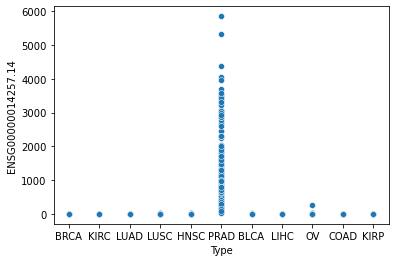

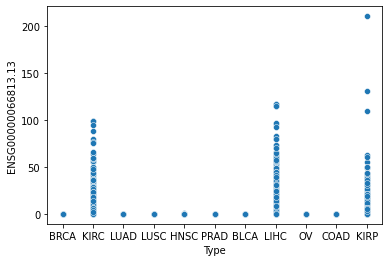

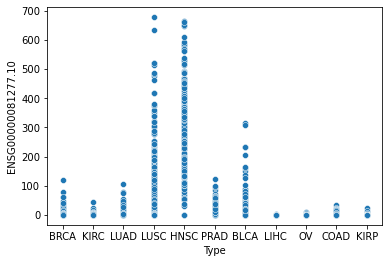

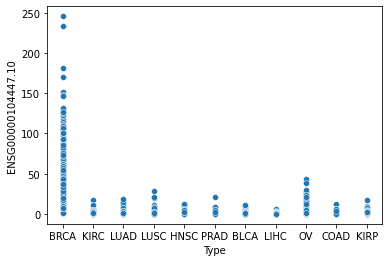

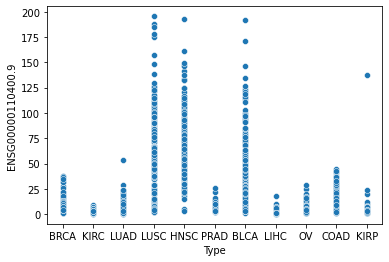

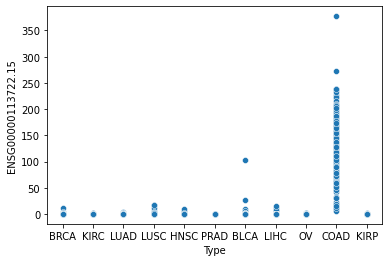

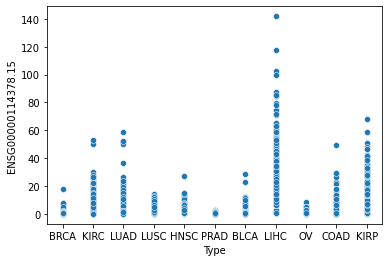

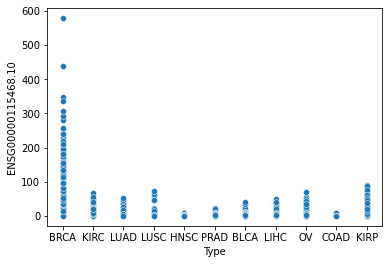

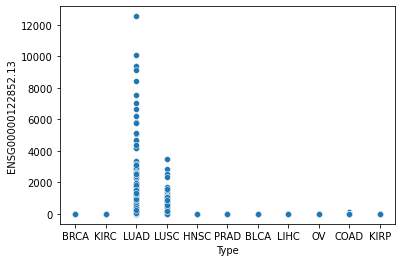

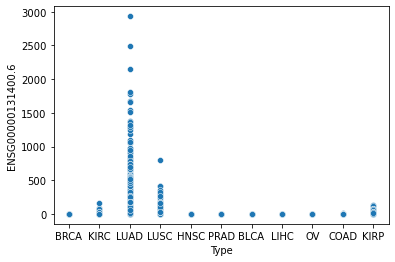

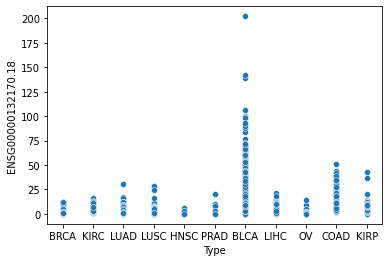

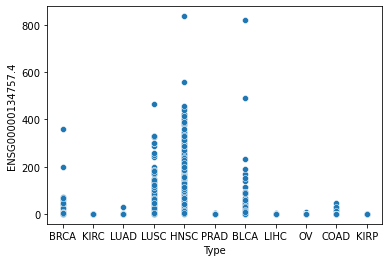

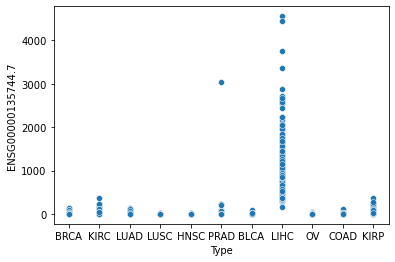

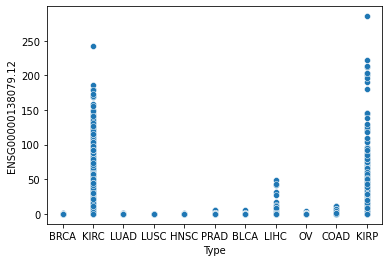

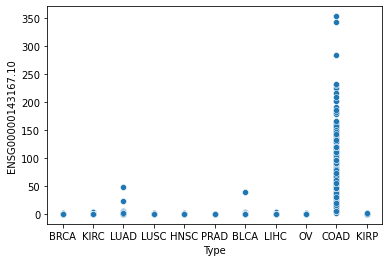

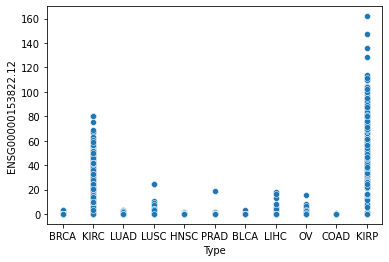

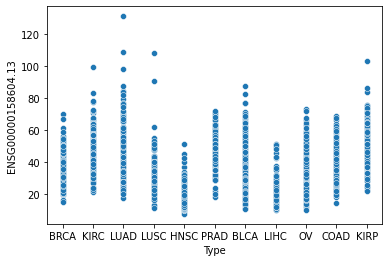

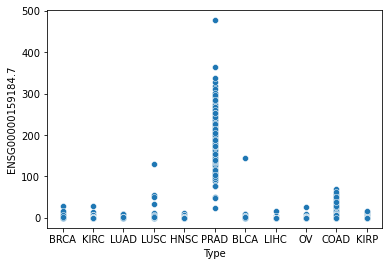

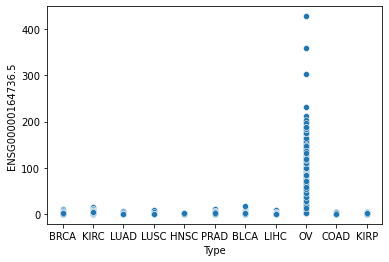

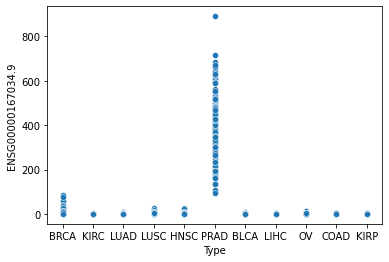

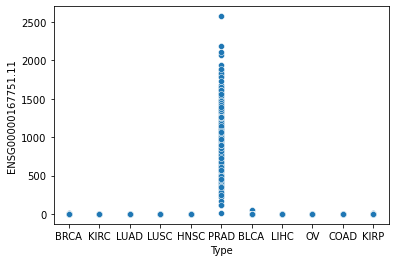

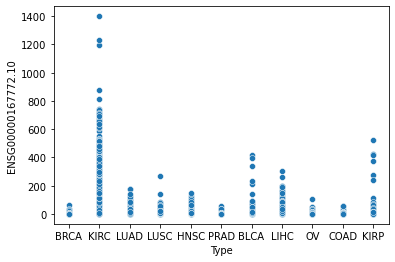

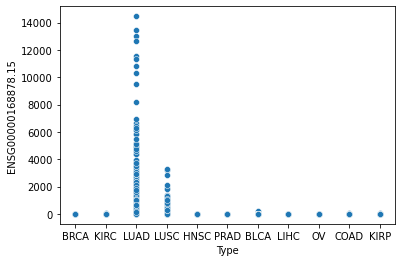

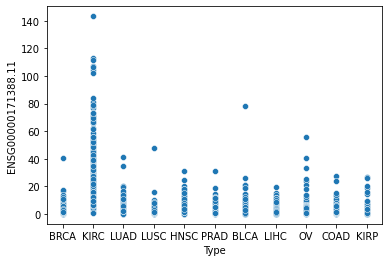

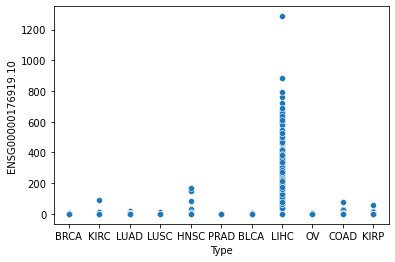

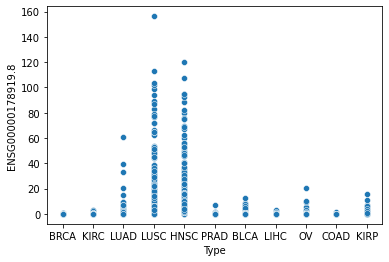

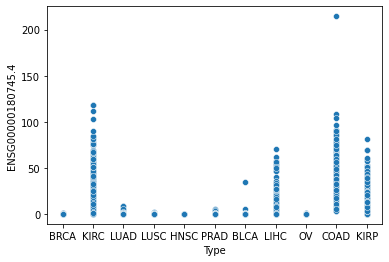

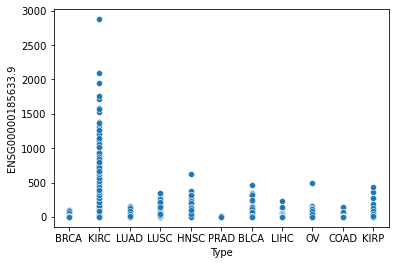

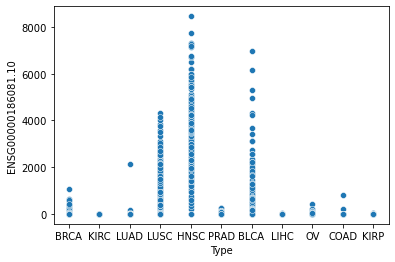

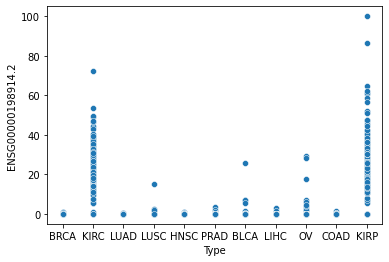

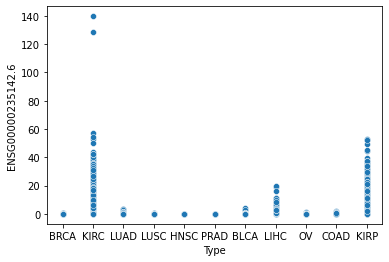

In [706]:
for i in important_genes:
    sns.scatterplot(x=data.Type, y=data[i])
    plt.show()

In [723]:
important_genes_df = data[['ENSG00000014257.14', 'ENSG00000066813.13', 'ENSG00000081277.10',
                           'ENSG00000104447.10', 'ENSG00000110400.9', 'ENSG00000113722.15',
                           'ENSG00000114378.15', 'ENSG00000115468.10', 'ENSG00000122852.13',
                           'ENSG00000131400.6', 'ENSG00000132170.18', 'ENSG00000134757.4', 
                           'ENSG00000135744.7', 'ENSG00000138079.12', 'ENSG00000143167.10',
                           'ENSG00000153822.12', 'ENSG00000158604.13', 'ENSG00000159184.7',
                           'ENSG00000164736.5', 'ENSG00000167034.9', 'ENSG00000167751.11', 
                           'ENSG00000167772.10', 'ENSG00000168878.15', 'ENSG00000171388.11', 
                           'ENSG00000176919.10', 'ENSG00000178919.8', 'ENSG00000180745.4', 
                           'ENSG00000185633.9', 'ENSG00000186081.10', 'ENSG00000198914.2',
                           'ENSG00000235142.6']]
important_genes_df = pd.concat([data.iloc[:,1], important_genes_df], axis=1)

In [724]:
important_genes_df.head(3)

,Type,ENSG00000014257.14,ENSG00000066813.13,ENSG00000081277.10,ENSG00000104447.10,ENSG00000110400.9,ENSG00000113722.15,ENSG00000114378.15,ENSG00000115468.10,ENSG00000122852.13,...,ENSG00000167772.10,ENSG00000168878.15,ENSG00000171388.11,ENSG00000176919.10,ENSG00000178919.8,ENSG00000180745.4,ENSG00000185633.9,ENSG00000186081.10,ENSG00000198914.2,ENSG00000235142.6
0,BRCA,2.674544,0.004502,0.323267,12.644138,17.849844,0.160173,0.242353,38.930516,0.014985,...,5.470272,0.011915,2.261376,0.860819,0.0,0.031882,13.359699,12.921640,0.004936,0.053713
1,BRCA,1.665032,0.002028,1.742012,53.060547,6.444794,0.169390,0.311649,77.542220,0.006750,...,1.386425,0.048303,0.691690,0.306965,0.0,0.086166,3.543412,12.858823,0.036682,0.002503
2,BRCA,0.197974,0.000000,0.050119,90.689783,2.603851,0.014756,0.480386,40.126675,0.000000,...,1.118319,0.000000,2.152967,0.759985,0.0,0.067554,7.035269,0.417036,0.000000,0.043169


## <span style="color:#FF8921">Support Vector Machines</span>

In [727]:
# SVM based on the 31 features selected based on the results from classification tree and random forest
svm_train, svm_test = train_test_split(important_genes_df, test_size=40, stratify=data.Type)
svm_test.Type.value_counts()

HNSC    4
OV      4
BLCA    4
COAD    4
KIRC    4
LUAD    4
PRAD    4
LIHC    3
BRCA    3
LUSC    3
KIRP    3
Name: Type, dtype: int64

In [728]:
from sklearn.svm import SVC
svm = SVC()

In [737]:
svm = SVC(C = 1, kernel='linear')
svm.fit(X = svm_train.iloc[:,1:], y = svm_train.iloc[:,0])

SVC(C=1, kernel='linear')

In [738]:
svm_pred = svm.predict(svm_test.iloc[:,1:])
svm_pred

array(['LIHC', 'HNSC', 'OV', 'OV', 'COAD', 'COAD', 'COAD', 'BRCA', 'LIHC',
       'KIRC', 'LUAD', 'KIRC', 'BLCA', 'HNSC', 'OV', 'HNSC', 'PRAD',
       'KIRC', 'BRCA', 'HNSC', 'PRAD', 'BLCA', 'LUSC', 'KIRP', 'LUSC',
       'OV', 'KIRP', 'LUAD', 'OV', 'KIRC', 'LIHC', 'PRAD', 'LUAD', 'BRCA',
       'BLCA', 'BLCA', 'PRAD', 'COAD', 'LUAD', 'KIRP'], dtype=object)

In [746]:
print(confusion_matrix(svm_test.iloc[:,0], svm_pred))
print("SVM w/31 features:", accuracy_score(svm_test.iloc[:,0], svm_pred))

[[3 0 0 0 0 0 0 0 0 1 0]
 [0 3 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0]
 [1 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 4]]
SVM w/31 features: 0.95


### <span style="color:orange">Cross Validation (sva)</span>

In [749]:
sva_clf = SVC(C = 1, kernel='linear')
cross_val_score(estimator=sva_clf, X = important_genes_df.iloc[:,1:], y = important_genes_df.iloc[:,0], scoring="accuracy", cv=5).mean()

0.9355123774358051